<a href="https://colab.research.google.com/github/ArtemZiborov/react-/blob/main/California_houses_price_prediction_Coursework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artjoms Ziborovs
<h1> Artificial Intelligence Coursework: 1 </h>

<h2> Application of Deep Learning method for Price prediction using California Housing database</h2>  



<h3>California Housing Data Set Description</h3>

>California housing data set contains data drawn from the 1990 U.S. Census. The following table in Figure 1 provides descriptions, data ranges, and data types for each feature in the data set.
Data methodology was described in the census paper:
Information data was collected on the variables using all the block groups in California from the 1990 Census. In this sample, a block group, on average, includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. The distance was computed among the centroids of each block group as measured in latitude and longitude. All the block groups reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on nine characteristics.[California Housing Data Set Description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

<h3>Figure1 </br> California houses dataset description</h3>

|Column title|	Description|Range*|	Datatype|  
|:----:       |:----:      |:----:|:----:   |
|longitude  |A measure of how far west a house is; a more negative value is farther west |Longitude values range from -180 to +180 Data set min: -124.3 data set max: -114.3|float64|
|latitude|A measure of how far north a house is; a higher value is farther north|Latitude values range from -90 to +90 Data set min: 32.5 Data set max: 42.5|float64|
|housingMedianAge|Median age of a house within a block; a lower number is a newer building| Data set min: 1.0 Data set max: 52.0| float64|
|totalRooms|Total number of rooms within a block| Data set min: 2.0 Data set max: 37937.0| float64|
|totalBedrooms|	Total number of bedrooms within a block|Data set min:1.0 Data set max: 6445.0|float64|
|population|Total number of people residing within a block|Data set min:3.0 Data set max:35682.0|float64|
| households|Total number of households, a group of people residing within a home unit, for a block|Data set min: 1.0 Data set max: 6082.0| float64||medianIncome|	Median income for households within a block of houses (measured in tens of thousands of US Dollars)| Data set min: 0.5 Data set max: 15.0| float64|
|medianHouseValue|	Median house value for households within a block (measured in US Dollars)| Data set min: 14999.0 Data set max: 500001.0| float64|




<h3>Hypotheses</h3>

* The output of an algorithm after it has been trained on a California houses dataset and applied to new data the likelihood of a particular outcome.
* The available data is sufficient and informative to learn the relationship between inputs and outputs.

>The common type of machine learning problem is regression, which consists of predicting a constant value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data or predicting the time that a software project will take to complete, given its specifications. In California houses dataset we will use 8 input parameters described in a Figure 1
Each *feature* in the California housing dataset (for example, population or number of rooms) is split as training/test ratio, for training data 50% and test data 50%. Amount of training data was defined as `n_train = int(n_examples * 0.50)` and testing data `n_test = int(n_examples * 0.50)`. 

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError

><h2>Importing necessary libraries</h2>


><h3>Tensors</h3>
Tensors are multi-dimensional arrays with a uniform type (called a data type), and they are (kind of) like np. arrays.
All tensors are immutable, like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

>TensorFlow follows standard Python indexing rules, similar to indexing a list or a string in Python{:.external}, and the basic rules for NumPy indexing.
Indexes start at 0 negative indices count backwards from the end
colons, :, are used for slices: start:stop:step

><h3>Tensorflow</h3>
TensorFlow is a Python-based, free, open-source machine learning platform developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors. However, TensorFlow goes far beyond the scope of NumPy in the following ways:

* It can automatically compute the gradient of any differentiable expression, making it highly suitable for machine learning. 
* It can run not only on CPUs but also on GPUs and TPUs, highly parallel hardware accelerators. Computation defined in TensorFlow can be easily distributed across many machines.
* TensorFlow programs can be exported to other runtimes, such as C++, JavaScript (for browser-based applications), TensorFlow Lite (for applications running on mobile devices or embedded devices), Etc. 
* This makes TensorFlow applications easy to deploy in practical settings.

>`Chollet, Francois. Deep Learning with Python, Second Edition (p. 69). Manning. Kindle Edition.`

><h3>Keras</h3>
Keras is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation. Through TensorFlow, Keras can run on top of different types of hardware (see figure 3.1)—GPU, TPU, or plain CPU—and can be seamlessly scaled to thousands of machines.

>`Chollet, Francois. Deep Learning with Python, Second Edition (p. 69). Manning. Kindle Edition.`

>The listed below may be translated to TensorFlow APIs: 
  * Tensors, including special tensors that store the network’s state (variables)
  * Tensor operations such as addition, ReLu, matmul
  * Backpropagation, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object) 

>Second, high-level deep learning concepts. This translates to Keras APIs: 
* Layers, which are combined into a model. 
* A loss function, which defines the feedback signal used for learning. 
* An optimizer, which determines how learning proceeds.
* Metrics to evaluate model performance, such as accuracy.
* A training loop that performs mini-batch stochastic gradient descent.`Chollet, Francois. Deep Learning with Python, Second Edition (p. 69). Manning. Kindle Edition.`

>The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.[Mean Squared Error Definition](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)

>Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
If the absolute value is not taken (the signs of the errors are not removed), the average error becomes the Mean Bias Error (MBE) and is usually intended to measure average model bias. MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.[Mean Absolute Error Definition](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)
 

In [ ]:
# =============================================================================
# 2 load data
# =============================================================================
!wget https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz
!tar -xvf cal_housing.tgz
# The file containing dataset "cal_housing.data.tgz" get open and read
# the lines into a list of strings
with open('CaliforniaHousing/cal_housing.data', 'r') as f:
    lines = f.readlines()

# The final newline character gets stripped from each line
lines = [line.strip() for line in lines]

# Each line splits into a list of strings
lines = [line.split(',') for line in lines]
# Data were reduced by 10000 inputs
del lines[-10000:]
# The data gets converted into a NumPy array
data = np.array(lines, dtype=np.float32)

# Open the file cal_housing.domain and read the lines into a list of strings
with open('CaliforniaHousing/cal_housing.domain', 'r') as f:
    features = f.readlines()

print(features)

--2022-11-16 11:43:21--  https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz
Resolving www.dcc.fc.up.pt (www.dcc.fc.up.pt)... 193.136.39.12
Connecting to www.dcc.fc.up.pt (www.dcc.fc.up.pt)|193.136.39.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441963 (432K) [application/x-gzip]
Saving to: ‘cal_housing.tgz.2’

cal_housing.tgz.2   100%[===================>] 431.60K   390KB/s    in 1.1s    

2022-11-16 11:43:24 (390 KB/s) - ‘cal_housing.tgz.2’ saved [441963/441963]

CaliforniaHousing/cal_housing.data
CaliforniaHousing/cal_housing.domain
['longitude: continuous.\n', 'latitude: continuous.\n', 'housingMedianAge: continuous. \n', 'totalRooms: continuous. \n', 'totalBedrooms: continuous. \n', 'population: continuous. \n', 'households: continuous. \n', 'medianIncome: continuous. \n', 'medianHouseValue: continuous. \n']



>The California Housing database gets imported from the Portuguese university  DA UNIVERSIDADE DO PORTO. This database will be used for this coursework to predict California housing prices. As you can see, we have all 9 (indexation starting from 0) *features* downloaded in a single file. The library contains more than twenty thousand six hundred entries (20600). Data were reduced by 10000 inputs `del lines[-10000:]`. 



In [ ]:

# =============================================================================
# 3. Seperate features and targets
# =============================================================================
# Getting California Houses Dataset features and targets
features = data[:,:8]
targets = data[:,-1]
# =============================================================================
# 4. data scaled
# =============================================================================
print("Min", min(targets))
print("Max", max(targets))
# Targets converted into a NumPy array
# Cast type of array to float for division
targets = np.array(targets).astype(float)

# NumPy array divided by 100,000 to a more manageable range
targets = np.divide(targets, 100000)
print(targets)

Min 14999.0
Max 500001.0
[4.526 3.585 3.521 ... 1.94  2.277 2.448]


>Received data get separated by features and targets. Python slicing technique was used to extract price samples from the dataset. Then extracted data gets converted into a NumPy array and cast to float data type for future division - scaling. Prices range from 14999.0 to 500001.0.

In [ ]:
# =============================================================================
# 5. split
# =============================================================================

# Shape on features and targets to check how many samples we have
features = np.array(features)


print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


n_examples = len(features)

# Training and testing data amount gets separated 50% for training 
# and 50% for testing 
n_train = int(n_examples * 0.50)
n_test = int(n_examples * 0.50)

# The data split into training and testing sets
train_features = features[:n_train, :]
train_targets = targets[:n_train]

test_features = features[:n_test, :]
test_targets = targets[:n_test]

print("Training features shape:", train_features.shape)
print("Training targets shape:", train_targets.shape)
print("Testing features shape:", test_features.shape)
print("Testing targets shape:", test_targets.shape)

Features shape: (10640, 8)
Targets shape: (10640,)
Training features shape: (5320, 8)
Training targets shape: (5320,)
Testing features shape: (5320, 8)
Testing targets shape: (5320,)


After spliting the data we can observe 10640 features in total 5320 training samples and 5320 test (target) samples, each with 8 numerical features, such as per population, number of rooms, longtitude, and so on.

In [ ]:
# =============================================================================
# 6. Normalisation, only the features
# =============================================================================

mean = train_features.mean(axis = 0)
train_features -= mean # shift
std = train_features.std(axis = 0)
train_features /= std # rescale

test_features -= mean
test_features /= std
train_features.shape[1]

8

>The problem in the case of the California Housing dataset is input data with different ranges of values. Nevertheless, the problem can be solved by applying automatic adaptation to heterogeneous data, but it makes learning more difficult. To deal with such a problem, feature-wise normalization applyed. For each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide it by the standard deviation so that the feature is centred around 0 and has a unit standard deviation. This is quickly done in NumPy.`"Chollet, Francois. Deep Learning with Python, Second Edition (p. 114).`



The math...

$$
\bbox[5px,border:2px solid red]
{
X'={\frac {X-X_{\min }}{X_{\max}-X_{\min }}}}
$$

$X$: our data   
$X_{\min }$: the min value in our data  
$X_{\max}$: the max value in our data  

Test data is normalised using the mean and standard deviation of the *training* set.

In general, we want the **train** and **test** (and any further data) sets to come for the **same distribution**.

But we also want to keep our **test** aside, not get any influence from it.

Treat it as if was really data our net would encounter *in the wild*.

In [ ]:
# =============================================================================
# 7. build the model
# =============================================================================
opt = keras.optimizers.Adam()
def build_model():
    model = models.Sequential()
    #intermediate layers, each with 128 units
    model.add(layers.Dense(128, activation = 'relu', input_shape = (train_features.shape[1],)))
    model.add(layers.Dense(128, activation = 'relu'))  
    # ↓ NO ACTIVATION! Just predict (any) number
    model.add(layers.Dense(1))
    # ↑ -------------------------------------------
    model.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae', 'accuracy']
    )
    
    return model


>Before building model, Adam Optimizer will be used.

>Adaptive Moment Estimation - Adam is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.[Intuition of Adam Optimizer](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/)

>A deep learning model is a graph of layers. In Keras, that’s the Model class. In this model I'm using Sequential models (a subclass of Model), which are simple stacks of layers, mapping a single input to a single output. `Chollet, Francois. Deep Learning with Python, Second Edition (p. 87). Manning. Kindle Edition.` 

>The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.[A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

>Because our model is reduced, we’ll use a smaller model with three intermediate layers, each with 128 units. In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting.`Chollet, Francois. Deep Learning with Python, Second Edition (p. 115). Manning. Kindle Edition.` 

In [ ]:
# =============================================================================
# custom callback
# =============================================================================
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        super(tf.keras.callbacks.Callback, self).__init__()
        self.epochs = epochs
    def on_epoch_begin(self, epoch, logs=None):
        c = ['|', '/', '-', '\\'] 
        print(f"\r{c[epoch % 4]} epoch: {epoch+1}/{self.epochs}", end="")
    def on_train_end(self, logs=None):
        print()
    

>A callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference. Examples include tf.keras.callbacks.TensorBoard to visualize training progress and results with TensorBoard, or tf.keras.callbacks.ModelCheckpoint to periodically save your model during training.

<!-- | households|Total number of households, a group of people residing within a home unit, for a block|Data set min: 1.0 Data set max: 6082.0| float64||medianIncome|	Median income for households within a block of houses (measured in tens of thousands of US Dollars)| Data set min: 0.5 Data set max: 15.0| float64|
|medianHouseValue|	Median house value for households within a block (measured in US Dollars)| Data set min: 14999.0 Data set max: 500001.0| float64| -->

In [ ]:
  
# =============================================================================
# k fold
# =============================================================================
K = 6
num_val_samples = len(train_features) // K
num_epochs = 500
all_mae_histories = []

mse = []
mae = []
acc = []

for i in range(K):
    print('processing fold', i)
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_features[a : b]
    val_targets = train_targets[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_features = np.concatenate([train_features[:a], train_features[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    history = model.fit(
        partial_train_features,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        validation_split=0.2,
        epochs=num_epochs, batch_size=150, verbose=1, 
        callbacks=[CustomCallback(num_epochs)]
    )

    
    # Validation history
    val_mse, val_mae, val_acc = model.evaluate(val_data, val_targets, verbose=0)

    print("Validation MSE:", val_mse)
    print("Validation MAE:", val_mae)
    print("Validation Accuracy:", val_acc)

    # Append to the corresponding arrays
    mse.append(val_mse)
    mae.append(val_mae)
    acc.append(val_acc)

    mae_history = history.history['val_mae']

    all_mae_histories.append(mae_history)
    # rescaling data to original values
    targets = np.multiply(mae_history, 100000)
    print(targets)

<h3>Validating your approach using K-fold validation</h3>

>To evaluate our model while we keep adjusting its parameters (such as the number of epochs used for training), we could split the data into a training set and a validation set. As a consequence, the validation scores might change a lot depending on which data points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.
`Chollet, Francois. Deep Learning with Python, Second Edition (pp. 115-116). Manning. Kindle Edition.` 

In [ ]:
def smooth_curve(points, beta = 0.9):       # beta must be between 0 and 1!
    smoothed_points = []
    for current in points:
        if smoothed_points:                 # (an nonempty list is 'True')
            previous = smoothed_points[-1]  # the last appended point
                                            # ↓ a weighted sum of previous & point, controlled by beta
            smoothed_points.append(beta * previous + (1 - beta) * current)
        else:
            smoothed_points.append(current) # at the start, the list is empty, we just add the first point
    return smoothed_points

<h3>Smoothing a curve</h3>

>If you import a curve from an instrument, you may wish to smooth the data to improve the appearance of a graph. Since you lose data when you smooth a curve, you should not smooth a curve prior to nonlinear regression or other analyses. Smoothing is not a method of data analysis, but is purely a way to create a more attractive graph.[Smoothing, differentiating and integrating curves](https://www.graphpad.com/guides/prism/latest/statistics/stat_smoothing_differentiating_and_integrating_curves.htm)


Validation MSE (Max, Min): 0.9524012804031372 0.26046350598335266
Validation MAE (Max, Min): 0.7120282053947449 0.34874647855758667
Validation Accuracy (Max, Min): 0.013544018380343914 0.0011286681983619928


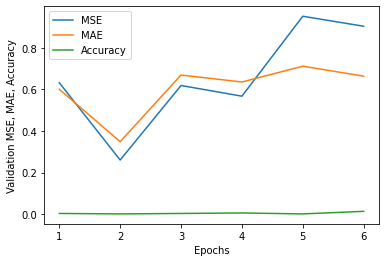

In [ ]:
# Validation MSE (Max, Min)
mse_max = max(mse)
mse_min = min(mse)
print("Validation MSE (Max, Min):", mse_max, mse_min)

# Validation MAE (Max, Min)
mae_max = max(mae)
mae_min = min(mae)
print("Validation MAE (Max, Min):", mae_max, mae_min)

# Validation Accuracy (Max, Min)
acc_max = max(acc)
acc_min = min(acc)
print("Validation Accuracy (Max, Min):", acc_max, acc_min)

# Plot mse, mae and acc
plt.plot(range(1, len(mse) + 1), mse)
plt.plot(range(1, len(mae) + 1), mae)
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE, MAE, Accuracy')
plt.legend(['MSE', 'MAE', 'Accuracy'])
plt.show()

![Image 1](https://drive.google.com/uc?export=view&id=1jmZa7l9LWAx6DyXWJKJjUbIZprp5IwJE)

<small>[Overfitting & Underfitting in Machine Learning](https://vitalflux.com/overfitting-underfitting-concepts-interview-questions/)</small>


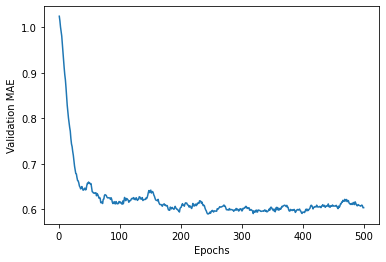

In [ ]:
sm_history = smooth_curve(np.array(all_mae_histories).mean(axis=0))
plt.plot(range(1, len(sm_history) + 1), sm_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

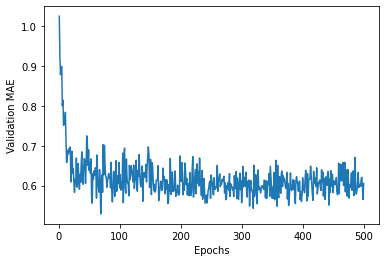

In [ ]:

average_mae_history = np.array(all_mae_histories).mean(axis=0)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

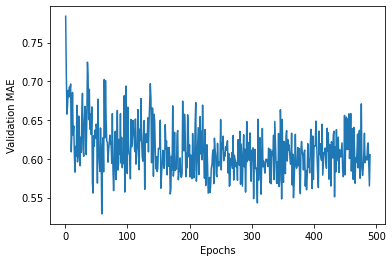

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(
    train_features, # ← WHOLE TRAINING DATA
    train_targets,
#            # ↓ EPOCH WITH LOWEST MAE ------
    epochs = np.argmin(average_mae_history), # could do another run with smooth_mae_history as well
#            # ↑ ----------------------------
    batch_size = 100
)

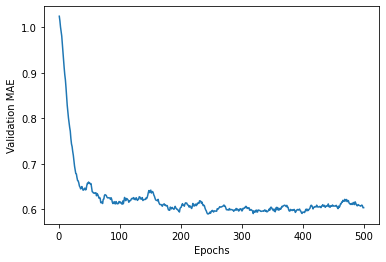

In [ ]:
sm_history = smooth_curve(np.array(all_mae_histories).mean(axis=0))
plt.plot(range(1, len(sm_history) + 1), sm_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

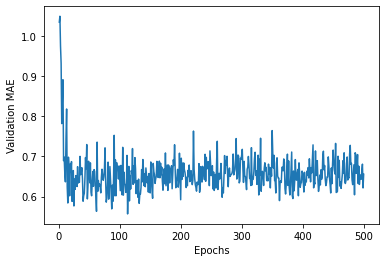

In [ ]:
average_mae_history = np.array(all_mae_histories).mean(axis=0)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In summary, using The California dataset with fewer input data *features* parameters, I can observe a massive improvement in processing validation, training and test data. Reducing the whole amount of data in the dataset will give better results in training, testing and validation. As depicted in the plotted graph in Figure 1, a total of 20640 samples model produced worse results on 500 epochs with several folds and a split data ratio of 25% for training and 75% for testing.  

|Model Seq.No |Number of layers | Layer denses | Number of Epochs | Batch size | Number of K-Folds | Learning Rate | Results |Amount of Data used|Training/test ratio|
|:-----------:|:-----------:|:--:|:------------:|:------------:|:----:|:-------:|:----------------:|:--------:|:---:|
1 | 3 | 128 | 500 | 150 | 4 |  0.001 | Overfitting data|20600|25%/75%|
2 | 2 | 128, 64 | 500 | 150 | 4 | Default | Improved results|10640|50%/50%
3 | 3 | 128 | 500 | 150 | 6 | Default | More improved results|10640|50%/50%

* Figure 2

![Figure 2](https://drive.google.com/uc?export=view&id=1ggxx-12xWXZIoDJSeJlQf3I6lAOhR1hA)

Test conducted 11/11/2022 at 20:30 
With Parameters 
K - fold = 4
num_epochs = 500
Using three dense layer and Adam optimiser with learning rate 0.01   


    def build_model():
    history = model.fit(
        partial_train_features,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=150, verbose=1, 
        callbacks=[CustomCallback(num_epochs)]
    )

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    targets = np.multiply(mae_history, 100000)
    print(targets)

    opt = keras.optimizers.Adam(learning_rate=0.001)

 
    model = models.Sequential()
    model.add(
        layers.Dense(
            128, activation = 'relu', input_shape = (train_features.shape[1], )
        )
    )
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae']
    )
    



